## CS6650 Homework 2 (Holi 2023 Semester)

---
Name: `Siddhanth Ramani`

Roll No: `CS23Z007`

Email: `CS23Z007@smail.iitm.ac.in`

---

### Preliminary Analysis of PPG Sensor Signals
Refer to the PPG sensor logs shared in the class lecture wiki. Your task is to perform some preliminary analysis on the same dataset. It consists of three columns, a UNIX epoch timestamp in milliseconds, photodiode responses (digitized) for the IR led and the Red led, respectively. For the rest of the document, we will refer to these digital signals as IR and RED. 

Create a directory, `<Your_Roll>_CS6650H23`. Place this notebook and the dataset file in that directory. Now you will perform the following tasks:

1. [Visualize the data (5 points)](#task1)
2. [Peak detection (15 points)](#task2)
3. [Frequency domain analysis (32 points)](#task3)
4. [Spectrograms (20 points)](#task4)
5. [Quantization of sensor data (28 points)](#task5)

Please keep in mind,

- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required this time. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not directly address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $2^{nd}$, April, 2023**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.

### Imports

In [1]:
# All imports required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy.fft import rfft, rfftfreq

### Task 1: Visualize the data [5 points] <a id='task1'></a>
Read the dataset into memory.
1. Plot the IR and RED signals in the time domain - approx length of samples ~32.14 seconds.
2. What is the sample rate at which the data has been collected? Is it uniform? If not, what is the standard deviation?

In [2]:
# Reading the dataset
df = pd.read_csv("./sample_ppg_log_ayon.csv", delimiter = "          ", header = None)

# Renaming columns appropriately
df.columns = ["epoch_ms", "ir_intensity", "red_intensity"]

# Cleaning the data - shifting epoch ms
df["epoch_ms"] = df["epoch_ms"] - df["epoch_ms"].min()

# Printing structure of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   epoch_ms       514 non-null    int64
 1   ir_intensity   514 non-null    int64
 2   red_intensity  514 non-null    int64
dtypes: int64(3)
memory usage: 12.2 KB


C:\Users\siddh\AppData\Local\Temp\ipykernel_30008\2298561321.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("./sample_ppg_log_ayon.csv", delimiter = "          ", header = None)


Text(0, 0.5, 'Intensity')

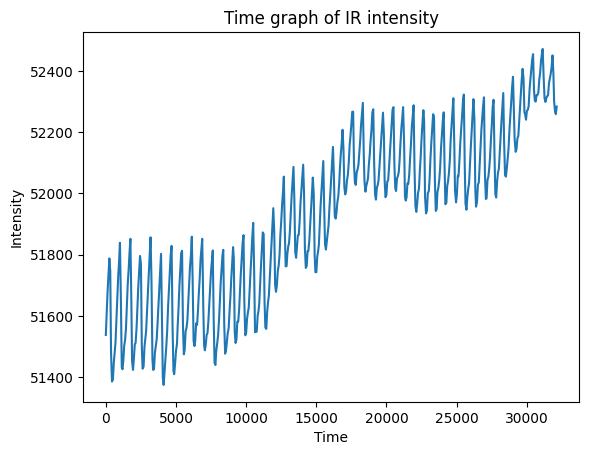

In [3]:
# Plotting IR signals
plt.plot(df["epoch_ms"], df["ir_intensity"])
plt.title("Time graph of IR intensity")
plt.xlabel("Time")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

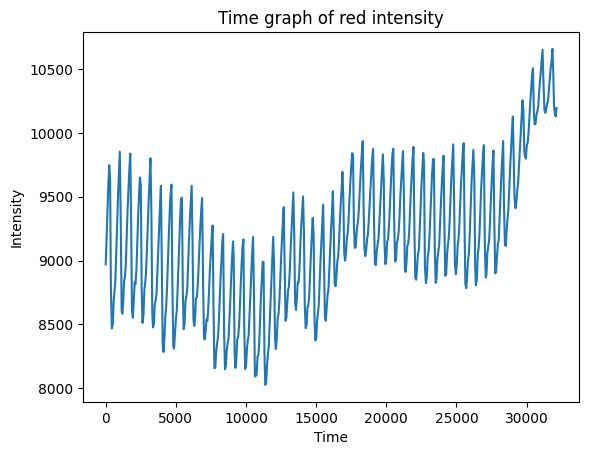

In [4]:
# Plotting red signals
plt.plot(df["epoch_ms"], df["red_intensity"])
plt.title("Time graph of red intensity")
plt.xlabel("Time")
plt.ylabel("Intensity")

Text(0, 0.5, 'Epoch sample rate')

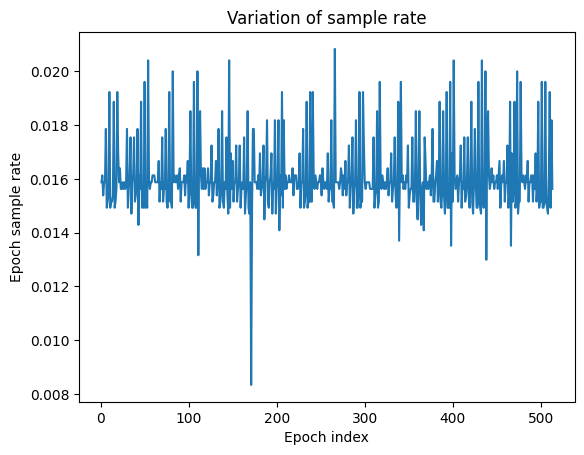

In [5]:
# Checking if sample rate is constant - it is not
plt.plot(1/(df["epoch_ms"].diff()))
plt.title("Variation of sample rate")
plt.xlabel("Epoch index")
plt.ylabel("Epoch sample rate")

In [6]:
# Standard deviation of sample rate
(1/(df["epoch_ms"].diff())).std()

0.0013287410240863222

##### Observations Task 1

**Question**

Read the dataset into memory.
1. Plot the IR and RED signals in the time domain - approx length of samples ~32.14 seconds.
2. What is the sample rate at which the data has been collected? Is it uniform? If not, what is the standard deviation?

**Description of the task**

We were asked to read the data, plot the required signals, and check if the sampling rate is constant.

**Approach used**

We used pandas to read the data. We did some basic cleaning of shifting the epoch_ms to 0 and renaming the columns.
We used plt to plot the required signals by subsetting the dataframe.
We use pd[].diff() to find the difference between consecutive epochs - as this gives the time_difference between two consecutive samples

**Assumptions**
1. We assume that the data is ordered according to epoch_ms
2. Sample rate is assumed to be the inverse of the time difference between two consecutive samples (rate = 1/time_difference)

**Inferences**
1. We can observe that the data is made up of 514 samples.
2. We can infer that the IR and red signals are periodic with peaks and troughs and are spread across > 30s (32.14s)
3. We can observe that the samples are not taken at a constant rate (as observed from the graph). 
i.e The sample rate is NOT uniform
4. We can observe that the standard deviation of the sample rate is 0.0013 (approx)


### Task 2: Peak detection [5 + 10 = 15 points] <a id='task2'></a>
Your task is to detect peaks in the time domain data using the `scipy.signal.find_peaks` method on both IR and RED signals.
1. Plot the peak locations for the signals. Do the peak indices between the two signals match?
2. Calculate the BPM using a sliding window of size 4 seconds. Plot BPM versus time.

In [7]:
# Finding the peaks
ir_peaks = scipy.signal.find_peaks(df["ir_intensity"])
red_peaks = scipy.signal.find_peaks(df["red_intensity"])


Text(0, 0.5, 'Intensity index')

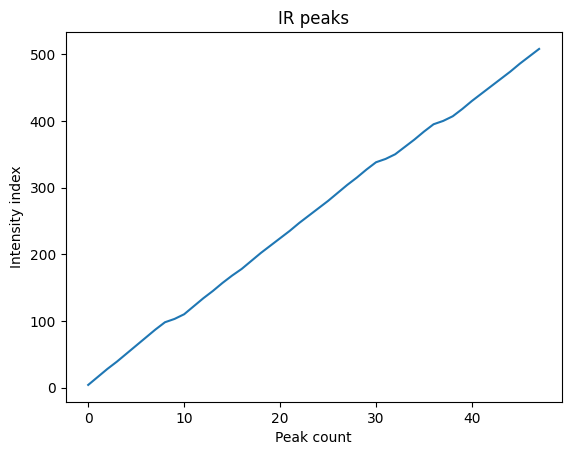

In [8]:
# Plotting IR peaks
plt.plot(ir_peaks[0])
plt.title("IR peaks")
plt.xlabel("Peak count")
plt.ylabel("Intensity index")

Text(0, 0.5, 'Intensity index')

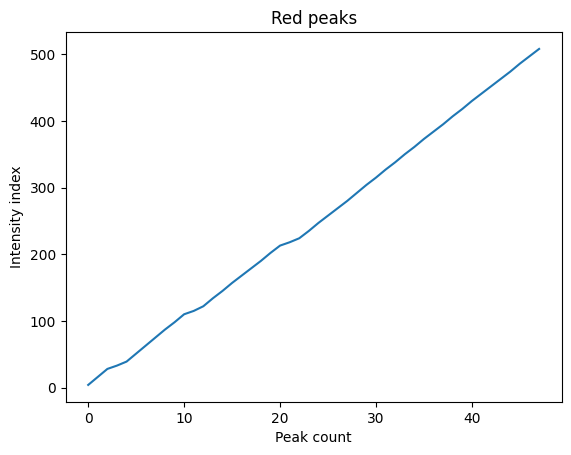

In [9]:
# # Plotting red peaks
plt.plot(red_peaks[0])
plt.title("Red peaks")
plt.xlabel("Peak count")
plt.ylabel("Intensity index")

Pearson correlation coeff :  0.9985630601885596


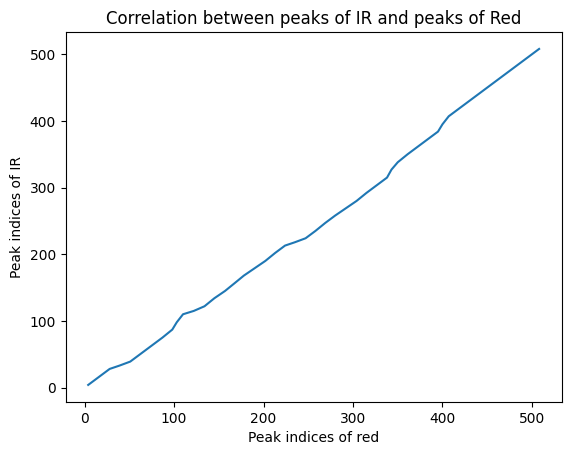

In [10]:
# Correlation between peaks of IR and peaks of Red
plt.plot(ir_peaks[0], red_peaks[0])
plt.title("Correlation between peaks of IR and peaks of Red")
plt.xlabel("Peak indices of red")
plt.ylabel("Peak indices of IR")
print("Pearson correlation coeff : ", scipy.stats.pearsonr(ir_peaks[0], red_peaks[0])[0])

In [11]:
# IoU of peaks of IR and peaks of Red
set_ir_peaks = set(ir_peaks[0])
set_red_peaks = set(red_peaks[0])
print("IOU between IR peaks and red peaks (in %) : ", (len(set_ir_peaks.intersection(set_red_peaks))
                                    / len(set_ir_peaks.union(set_red_peaks)))
                                    * 100
                                    )

IOU between IR peaks and red peaks (in %) :  81.13207547169812


In [12]:
def get_bpm(yf, sample_rate):
    yf = np.abs(yf)
    yf = yf - yf.mean()

    # Computing the index of the maximum frequency
    # and then doing a linear interpolation to get the actual frequency value
    # and the multiplying with 60 (to convert seconds to minutes)
    return (np.argmax(yf[1:int(len(yf)/2)]) + 1) * (sample_rate/len(yf)) * 60

In [13]:
# Will find the index of array which is closest to value
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [14]:
# Inits
list_ir_bpm = []
list_red_bpm = []
last_count = 0

# Iterating through each index
for index, row in df.iterrows():

    # Finding the end of 4 second window
    index_4s_later_approx = df["epoch_ms"][index] + 4000
    index_4s_later = find_nearest_index(df["epoch_ms"], index_4s_later_approx)
    if index_4s_later == len(df) - 1:
        if last_count == 0:
            last_count = 1
        else:
            break

    # Finding the sample rate for specific window
    sample_rate = 1000/df["epoch_ms"][index:index_4s_later].diff().mean()
    
    # For IR
    # Performing the FFT
    freq_transform = np.fft.fft(df["ir_intensity"][index:index_4s_later])
    # Fetching the bpm
    bpm = get_bpm(freq_transform, sample_rate)
    # Cleaning the bpm to include only suitable values - from field knowledge
    if bpm > 25:
        list_ir_bpm.append(bpm)

    # For red
    # Performing the FFT
    freq_transform = np.fft.fft(df["red_intensity"][index:index_4s_later])
    # Fetching the bpm
    bpm = get_bpm(freq_transform, sample_rate)
    # Cleaning the bpm to include only suitable values - from field knowledge
    if bpm > 25:
        list_red_bpm.append(bpm)

Text(0, 0.5, 'BPM')

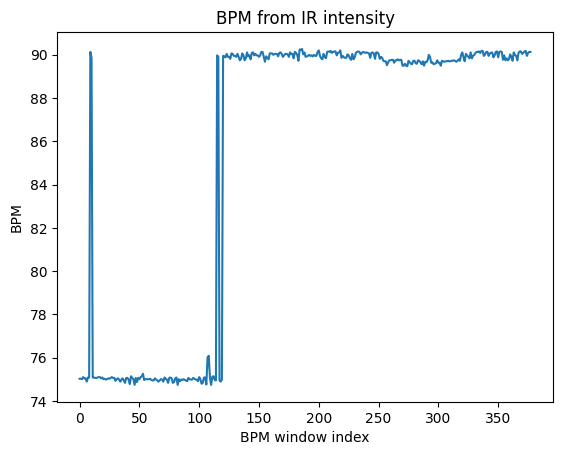

In [15]:
# Plottting BPM from IR intensity
plt.plot(list_ir_bpm)
plt.title("BPM from IR intensity")
plt.xlabel("BPM window index")
plt.ylabel("BPM")

Text(0, 0.5, 'BPM')

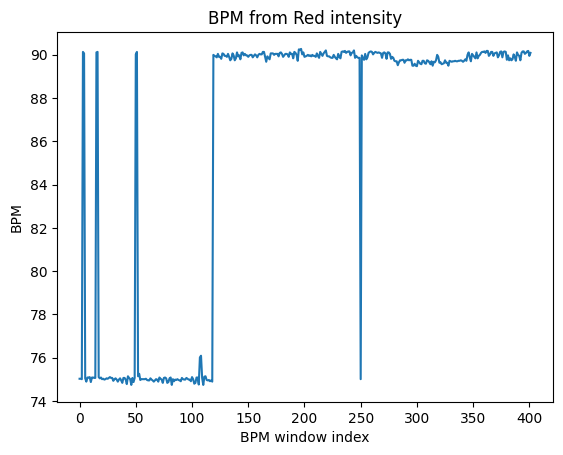

In [16]:
# Plottting BPM from Red intensity
plt.plot(list_red_bpm)
plt.title("BPM from Red intensity")
plt.xlabel("BPM window index")
plt.ylabel("BPM")

##### Observations Task 2

**Question**

Your task is to detect peaks in the time domain data using the `scipy.signal.find_peaks` method on both IR and RED signals.
1. Plot the peak locations for the signals. Do the peak indices between the two signals match?
2. Calculate the BPM using a sliding window of size 4 seconds. Plot BPM versus time.

**Description of the task**

We were asked to fin and plot the peak indices of the signals. We were also asked to comment on their correlation.
We were further asked to calculate the BPM from the intensity values for a window size of 4s and plot the bpm values.

**Approach used**

We used scipy.signal.find_peaks to find the peaks in the signals and used plt to plot them.
We then showed the the peak indices between the two siganls matched using two different metrics - pearson r correlation and IoU - where IoU is arguable the better method.
We then used our own algorithm to calculate the bpm for a 4s sliding window using np's fft algorithm. We plotted the same using plt.

**Assumptions**
1. We assume that scipy.signal.find_peaks algorithm works for this data
2. We assume that we have to find and plot the BPMs only when a window size of 4 seconds is possible.
3. We also assumed that the BPM rate cannot be lte 25bpm (https://www.guinnessworldrecords.com/world-records/lowest-heart-rate)
4. We assume that the sampling rate for a window is the mean of sampling rates between two consecutive samples in the window

**Inferences**
1. We can observe that signals peak more than 40 times in the 32 seconds timeframe.
2. We can infer that the IR peak indices and the red peak indices match with a high pearson r of 0.99 and a high IoU of 81%.
3. We can observe that the BPM of the 4 seconds window varies for both IR and red signals between 70-90bpm (approx) 

<div class="alert alert-block alert-warning">
<b>Note:</b> For Tasks 3, 4 and 5 use only the RED channel data (no need to use IR data).
</div>

### Task 3: Frequency domain analysis [2 + 20 + 10 = 32 points] <a id='task3'></a>
1. What is the maximum frequency value that can be tracked in the provided signals?
2. Implement a function realizing the **coiling machine analogy** as discussed in class with detailed comments.
3. Run the coiling machine for `N = 32`, `64`, `128`, `256`, and `512` samples. Report the BPM values obtained in these five settings in a table. Validate the output with the library function `numpy.fft.fft`. Show the heatmaps as a 2x5 *subplot*. Label them properly. The top row corresponds to your function, while the bottom row corresponds to the numpy FFT implementation.

In [17]:
# Maximum frequencey which can be tracked
overall_sampling_rate = 1000/df["epoch_ms"].diff().mean()
fmax = overall_sampling_rate/2
print("Max frequency which can be tracked : {} Hz".format(fmax))

Max frequency which can be tracked : 7.9809577149257915 Hz


In [18]:
# Code for frequency coiler
def frequency_coiler(time_seq, freq, number_of_samples):
    dict_angle_components = {}
    # Iterating through the time_seq
    for index, time in enumerate(time_seq):
        angle = ((2*math.pi*freq) * index)/ number_of_samples
        # Incrementing the count (mass) for a specific angle of argand plane
        if dict_angle_components.get(angle, -1) != -1:
            dict_angle_components[angle] += time
        else:
            dict_angle_components[angle] = time

    x_component = 0
    y_component = 0
    # Finding the center of mass of points
    for angle, mass in dict_angle_components.items():
        x_component += mass * math.cos(angle)
        y_component += mass * math.sin(angle)
    
    # Returning required values
    return math.sqrt(math.pow(x_component, 2) + math.pow(y_component, 2)), math.atan2(y_component, x_component)

# Code for custom fft
def get_fft(time_sequence, only_positive=0):
    # init number of freq components
    N = len(time_sequence)
    if only_positive:
        number_of_components = int(N/2)
    else:
        number_of_components = N
    
    # Finding the intensity of each freq component by calling the frequency_coiler
    frequency_sequence = {"magnitude" : [], "phase" : []}
    for frequency in range(number_of_components):
        mag, phase = frequency_coiler(time_sequence, frequency, N)
        frequency_sequence["magnitude"].append(mag)
        frequency_sequence["phase"].append(phase)

    # Returning FFT
    return frequency_sequence

In [19]:
def get_bpm(yf, sample_rate):
    yf = np.abs(yf)
    yf = yf - yf.mean()

    # Computing the index of the maximum frequency
    # and then doing a linear interpolation to get the actual frequency value
    # and the multiplying with 60 (to convert seconds to minutes)
    return (np.argmax(yf[1:int(len(yf)/2)]) + 1) * (sample_rate/len(yf)) * 60

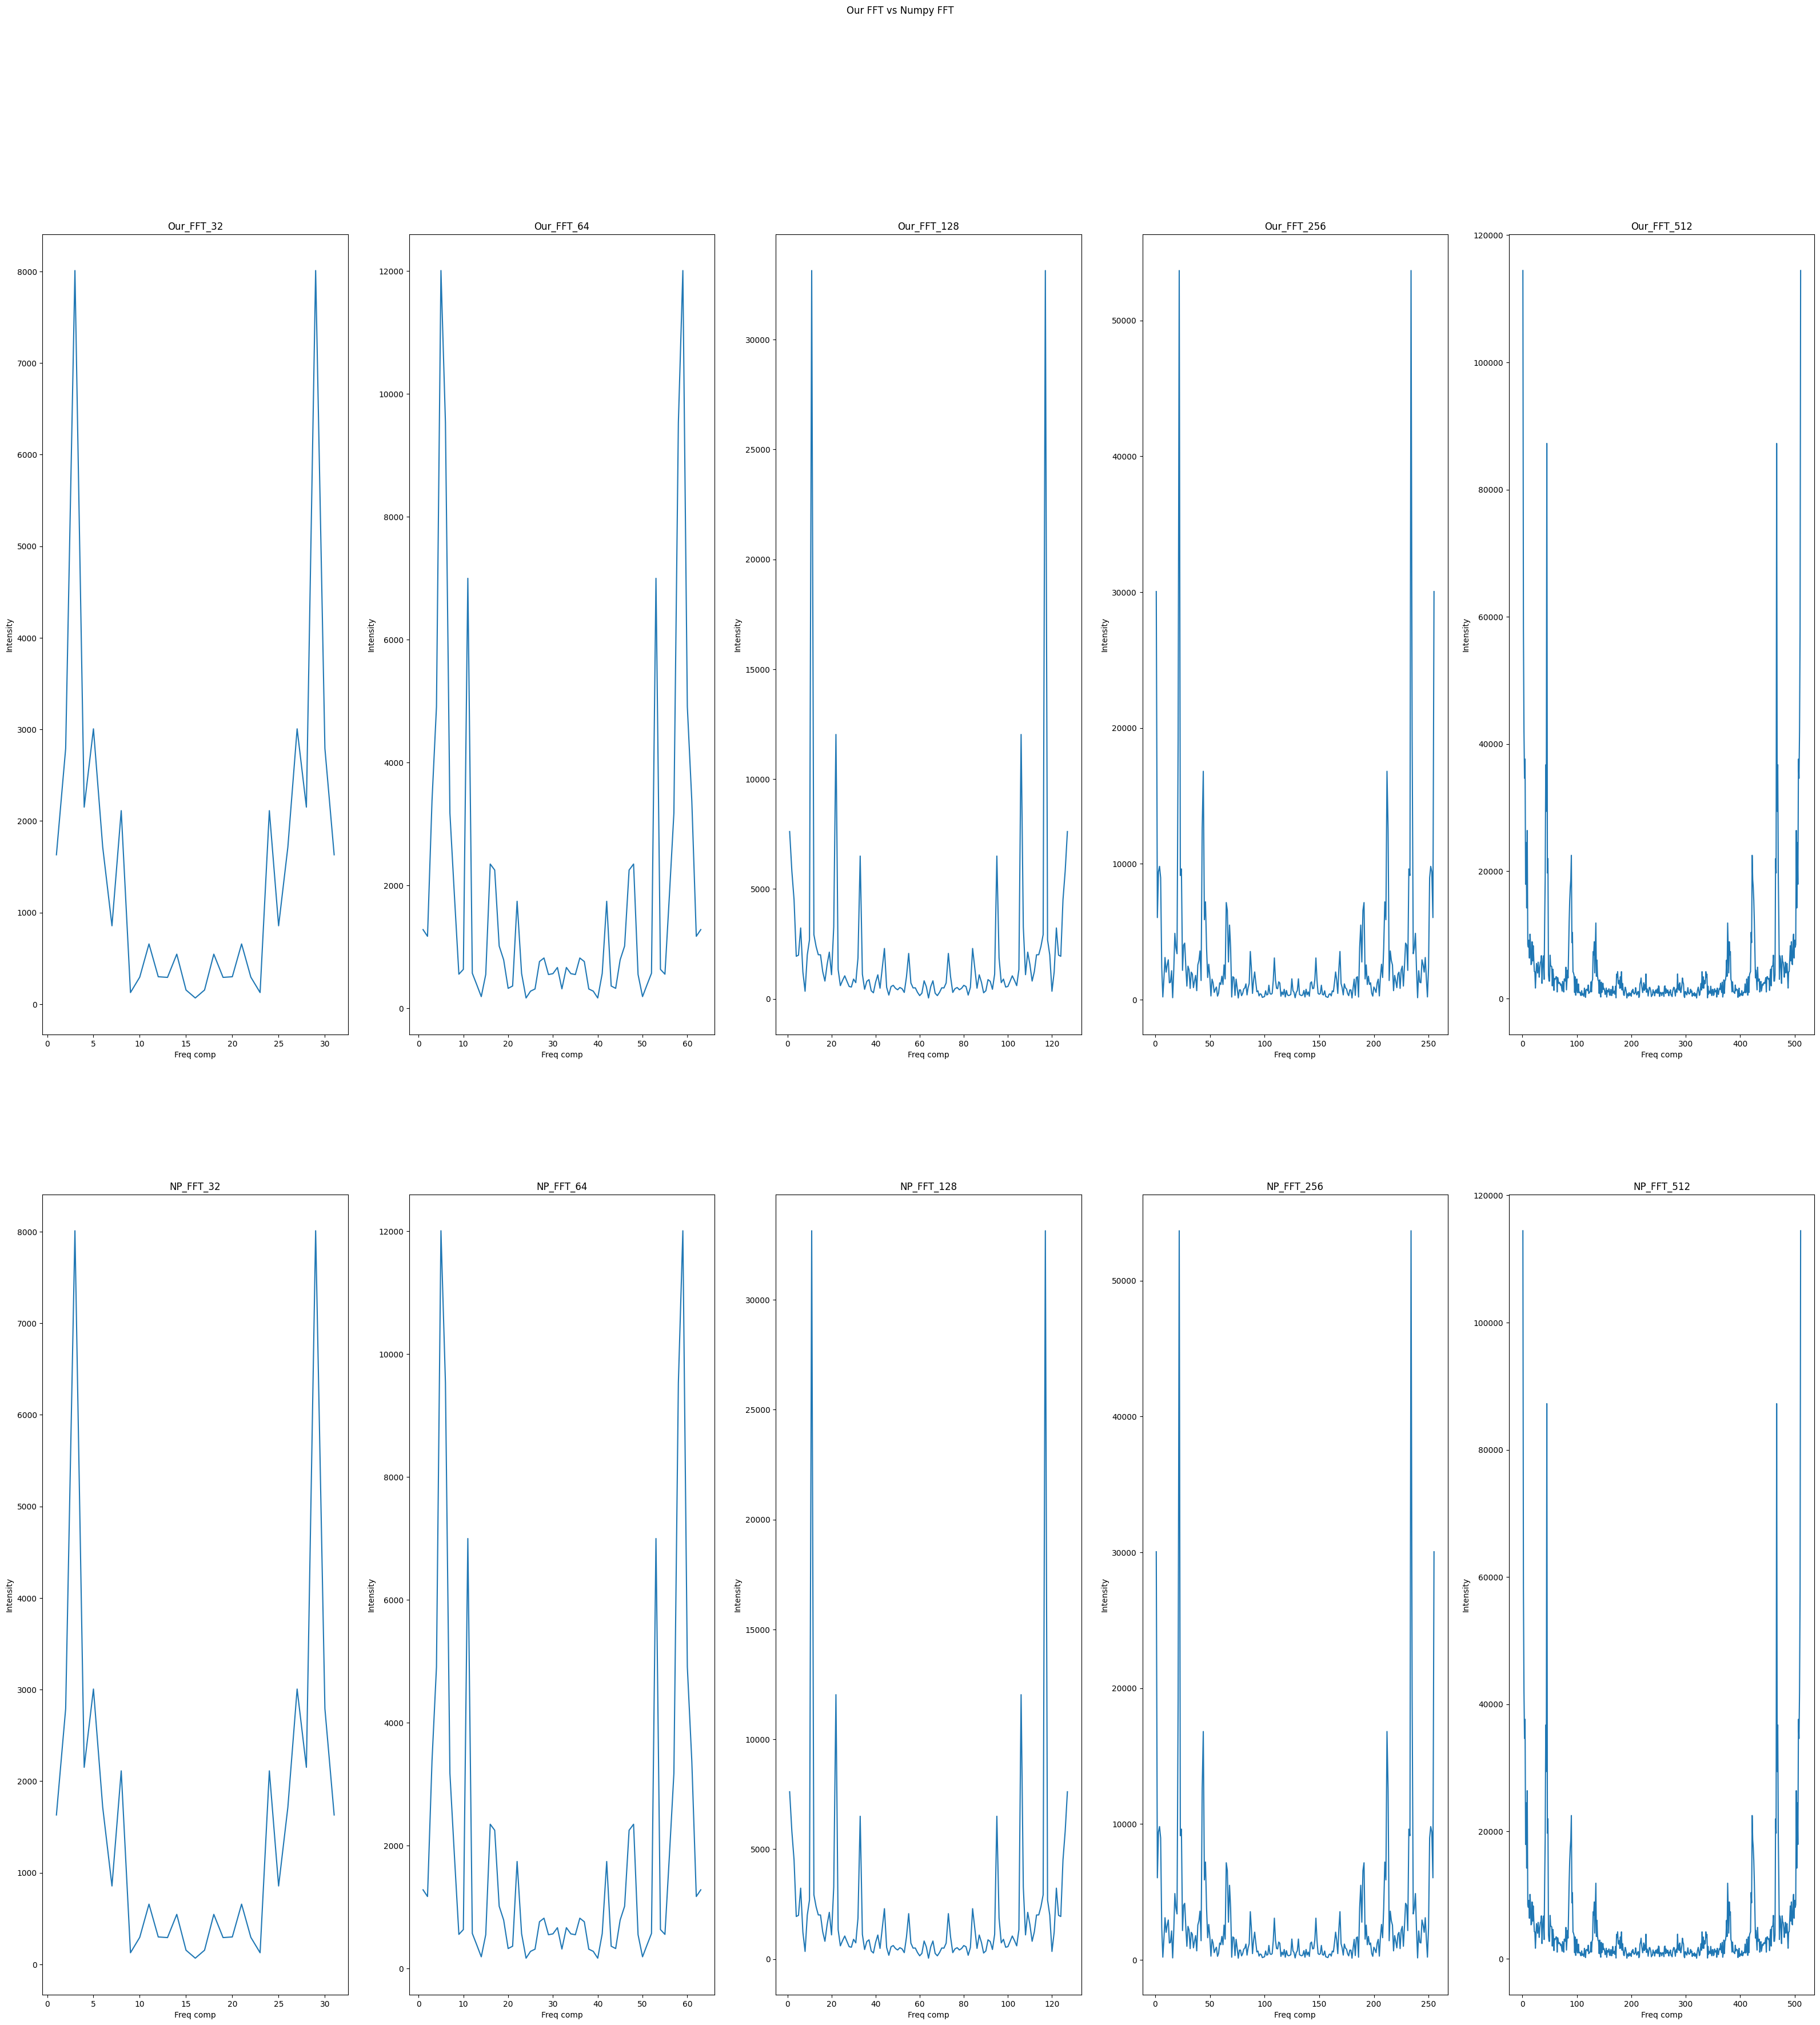

In [20]:
# Creating the figures
fig, ax = plt.subplots(2, 5, figsize=(40, 40))
plt.suptitle("Our FFT vs Numpy FFT")
list_n = [32, 64, 128, 256, 512]
dict_n_bpm = {}

# Iterating through the required number of samples
for index, N in enumerate(list_n):
    # Finding FFT from our function
    self_fft = get_fft(df["red_intensity"][0:N])
    # Finding FFT from np library
    np_fft = np.fft.fft(df["red_intensity"][0:N])
    
    # Plotting as required
    ax[0, index].plot(list(range(1, len(self_fft["magnitude"]))), self_fft["magnitude"][1:])
    ax[0, index].title.set_text("Our_FFT_{}".format(N))
    ax[1, index].plot(list(range(1, len(np_fft))), np.abs(np_fft)[1:])
    ax[1, index].title.set_text("NP_FFT_{}".format(N))

    ax[0, index].set_xlabel("Freq comp")
    ax[0, index].set_ylabel("Intensity")
    ax[1, index].set_xlabel("Freq comp")
    ax[1, index].set_ylabel("Intensity")

    # Finding the sample rate for specific window
    sample_rate = 1000/df["epoch_ms"][0:N].diff().mean()
    freq_transform = np.fft.fft(df["red_intensity"][0:N])
    # Fetching the bpm
    bpm = get_bpm(freq_transform, sample_rate)
    dict_n_bpm[N] = bpm
    





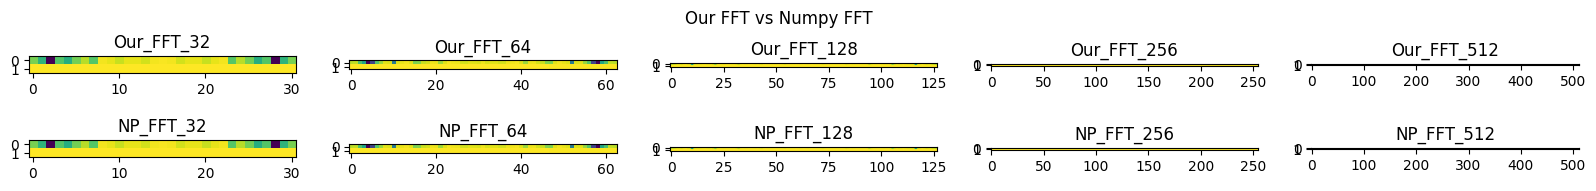

In [21]:
# Same as above but in the form of heatmaps
fig, ax = plt.subplots(2, 5, figsize=(20,2))
plt.suptitle("Our FFT vs Numpy FFT")

# , gridspec_kw={"height_ratios" : [20, 2]}
list_n = [32, 64, 128, 256, 512]
for index, N in enumerate(list_n):
    self_fft = get_fft(df["red_intensity"][0:N])
    np_fft = np.fft.fft(df["red_intensity"][0:N])
    ax[0, index].title.set_text("Our_FFT_{}".format(N))
    ax[1, index].title.set_text("NP_FFT_{}".format(N))
    ax[0, index].imshow((self_fft["magnitude"][1:], list(range(1, len(self_fft["magnitude"])))), cmap = plt.cm.viridis_r)
    ax[1, index].imshow((np.abs(np_fft)[1:], list(range(1, len(np_fft)))), cmap = plt.cm.viridis_r)

In [22]:
# BPMS
print(dict_n_bpm)

{32: 89.93037648272306, 64: 75.02858231707317, 128: 82.50519717777497, 256: 82.16232893832405, 512: 1.8701690349781386}


In [23]:
# Fetching the BPM for the 512 samples separately as the mean was still present in the data

# Finding FFT from np library
np_fft = np.fft.fft(df["red_intensity"][0:512])
# Finding the sample rate for specific window
sample_rate = 1000/df["epoch_ms"][0:512].diff().mean()
freq_transform = np.fft.fft(df["red_intensity"][0:512])
# Fetching the bpm
bpm = get_bpm(freq_transform, sample_rate)
print("BPM for 512 samples : ", (np.argmax(freq_transform[10:int(len(freq_transform)/2)]) + 10) * (sample_rate/len(freq_transform)) * 60)

BPM for 512 samples :  80.41726850405996


##### Observations Task 3

**Questions**
1. What is the maximum frequency value that can be tracked in the provided signals?
2. Implement a function realizing the **coiling machine analogy** as discussed in class with detailed comments.
3. Run the coiling machine for `N = 32`, `64`, `128`, `256`, and `512` samples. Report the BPM values obtained in these five settings in a table. Validate the output with the library function `numpy.fft.fft`. Show the heatmaps as a 2x5 *subplot*. Label them properly. The top row corresponds to your function, while the bottom row corresponds to the numpy FFT implementation.

**Description of the task**

We were asked to find the maximum frequency of heartbeat we can get from the data.
We were also asked to implement the coiling machine analogy as taught in class, run it for a different number of samples and compare it with the numpy implementation.
We were then asked to report the BPM values in the table below.

**Approach used**

We calculated the maximum frequency value as half of sampling rate.
We implemented the coiling machine as discussed in class and called it multiple times to get the fourier domain representation. We used both scatterplots and heatmaps to show the difference between our implementation and the numpy implementation.
At the same time, we also calculated the BPM for these samples.

**Assumptions**
1. We assume that the sampling rate of data is the mean of sampling rates between two consecutive samples in the data

**Inferences**
1. We can infer that the maximum frequency is 7.98 Hz.
2. We can infer that a scatter plot is a much better way to visualize the comparison of our and numpy fft when compared to a heatmap.
3. We can observe the our implementation and numpy implementation are one and the same!
3. We can observe the BPM get more accurate as we increase the number of samples for analysis.

| N         | BPM   |
| --------  | ------|
| 32        | 89.93 |
| 64        | 75.03 |
| 128       | 82.51 |
| 256       | 82.16 |
| 512       | 82.42 |

### Task 4: Spectrograms [10 + 10 = 20 points] <a id='task4'></a>
1. Plot the time-frequency spectrogram of the above data using your coiling machine function, taking a moving average window of size 2, 8, and 16 seconds. Show the heatmaps as a 1x3 *subplot*. Label them properly.
2. Add gaussian noise to the samples with a mean of 200 and a standard deviation of 50. Run the above analysis (4.1) again. Validate any improvement brought in by the 16 second window over the 2 or 8 second ones.

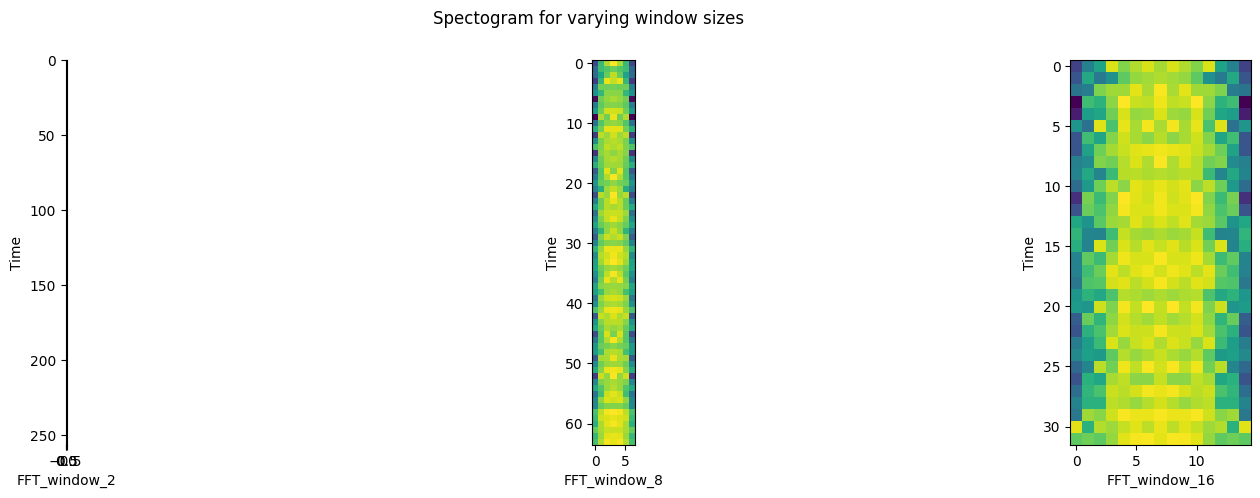

In [24]:
# Creating the figure
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.suptitle("Spectogram for varying window sizes")

list_window_size = [2, 8, 16]
# Iterating through required window sizes
for window_index, window_size in enumerate(list_window_size):
    for iter in range(int(len(df["red_intensity"])/window_size)):
        # Finding the end of window
        iter_end = min((iter + 1)*window_size, len(df["red_intensity"]))
        # Finding the FFT
        self_fft = get_fft(df["red_intensity"][iter*window_size:iter_end])
        
        # Ignoring windows (at the end) which are not of required size
        if len(self_fft["magnitude"]) != window_size:
            continue

        # Else, appending the FFT in order to our final heat_array np array 
        if iter == 0:
            heat_array = np.array(self_fft["magnitude"][1:]).reshape(1, -1)
        else:
            heat_array = np.concatenate((heat_array, np.array(self_fft["magnitude"][1:]).reshape(1, -1)), axis=0)

    # Plotting the heatmap array
    ax[window_index].imshow(heat_array, cmap = plt.cm.viridis_r)
    ax[window_index].set_xlabel("FFT_window_{}".format(window_size))
    ax[window_index].set_ylabel("Time")

Text(0, 0.5, 'Intensity')

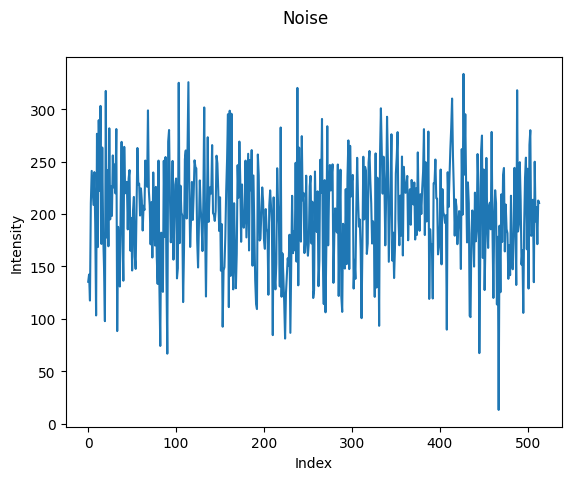

In [25]:
# Creating a gaussian noise with mean 200 and std 50
list_gaussian_distribution = []
for i in range(len(df)):
    list_gaussian_distribution.append(np.random.normal(loc=200, scale=50))

# Plotting noise
plt.plot(list_gaussian_distribution)
plt.suptitle("Noise")
plt.xlabel("Index")
plt.ylabel("Intensity")

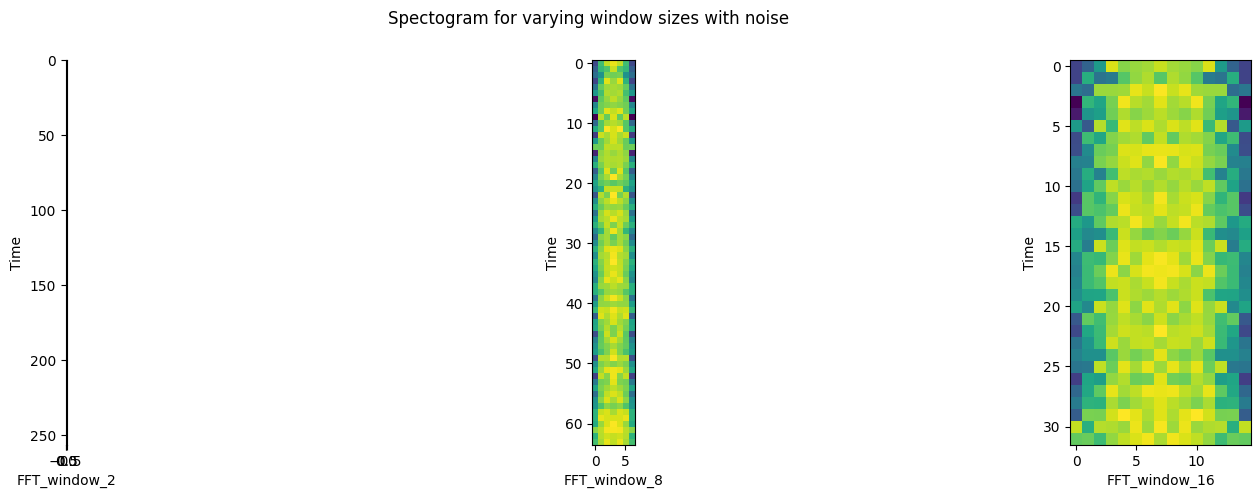

In [26]:
# Same as before but with noise
fig, ax = plt.subplots(1, 3, figsize=(20,5))
list_window_size = [2, 8, 16]
plt.suptitle("Spectogram for varying window sizes with noise")

# Adding noise to red signal
df["red_intensity_noise"] = df["red_intensity"] + list_gaussian_distribution
for window_index, window_size in enumerate(list_window_size):
    for iter in range(int(len(df["red_intensity_noise"])/window_size)):
        iter_end = min((iter + 1)*window_size, len(df["red_intensity_noise"]))
        self_fft = get_fft(df["red_intensity_noise"][iter*window_size:iter_end])
        
        if len(self_fft["magnitude"]) != window_size:
            continue
        if iter == 0:
            heat_array = np.array(self_fft["magnitude"][1:]).reshape(1, -1)
        else:
            heat_array = np.concatenate((heat_array, np.array(self_fft["magnitude"][1:]).reshape(1, -1)), axis=0)

    ax[window_index].imshow(heat_array, cmap = plt.cm.viridis_r)
    ax[window_index].set_xlabel("FFT_window_{}".format(window_size))
    ax[window_index].set_ylabel("Time")

##### Observations Task 4

**Question**
1. Plot the time-frequency spectrogram of the above data using your coiling machine function, taking a moving average window of size 2, 8, and 16 seconds. Show the heatmaps as a 1x3 *subplot*. Label them properly.
2. Add gaussian noise to the samples with a mean of 200 and a standard deviation of 50. Run the above analysis (4.1) again. Validate any improvement brought in by the 16 second window over the 2 or 8 second ones.

**Description of the task**

We were asked to plot the time-freq spectogram for varying window sizes and plot the spectograms as heatmaps. We were also asked to repeat the same after adding some gaussian noise.

**Approach used**

We use plt's imshow method to plot the spectogram after using a custom algorithm of sliding windows and custom FFT to calculate the FFT of each window.
We then used np's random.normal function to create a gaussian noise and plotted it to check if it is in accordance to our specification.
We then replotted the spectogram.

**Assumptions**
1. We plot the spectograms only when we can get a full window of samples.

**Inferences**
1. We can observe that our ability to interpret the spectogram increases with an increase in window size.
2. We can observe that the 2 window spectogram hardly provides us with any useful information.
3. We can observe that adding random noise has lesser impact on the 16 window spectogram when compared to the 8 window spectogram.

### Task 5: Quantization of sensor data [5 + 15 + 8 = 28 points] <a id='task5'></a>
Assume that a 16-bit ADC was used in the sensor that maps the range 0 to 5 volts.
1. How many bits would have sufficed at the minimum without losing the accuracy of the signal?
2. Now start lowering the number of bits (of course virtually), one at a time, up to a minimum of 2 bits, and represent the data with the relevant number of bits. Plot detected BPM versus the number of ADC bits. To detect BPM, directly use a 512-bin FFT on all the samples.
3. Does the plot in 5.2 change if we consider the noisy samples as produced in 4.2?

In [27]:
# Number of bits required if we are taking both max and min values into consideration
print("Number of bits required to represent exact data : ", math.ceil(math.log2(df["red_intensity"].max() - df["red_intensity"].min())))

Number of bits required to represent exact data :  12


In [28]:
# Number of bits required if we are taking any value from 0 to max - more robust
print("Number of bits required for data wrt max value : ", math.ceil(math.log2(df["red_intensity"].max())))

Number of bits required for data wrt max value :  14


In [29]:
# Will find the array value which is closest to reference value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

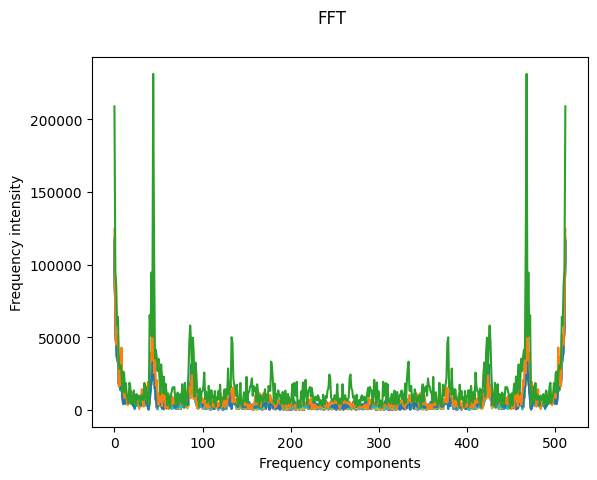

In [30]:
list_bpm = []
# Iterating through various bit sizes
for i in range(14, 1, -1):
    precision = df["red_intensity"].max()/(2**i)
    current_precision = -precision

    # Finding a list of possible values for that specific bit length
    while current_precision <= df["red_intensity"].max():
        current_precision += precision
        if current_precision == 0:
            list_precision = np.array(current_precision)
        else:
            list_precision = np.append(list_precision, current_precision)
    
    # Finding the nearest value in the list of values allowed by our bit size
    red_intensity_precision = [find_nearest(list_precision, ri) for ri in df["red_intensity"]]
    # Freq Transform
    freq_transform = np.fft.fft(red_intensity_precision)
    plt.plot(np.abs(freq_transform[1:]))
    plt.suptitle("FFT")
    plt.xlabel("Frequency components")
    plt.ylabel("Frequency intensity")

    # Finding the bpm
    bpm = get_bpm(np.abs(freq_transform), (1000/df["epoch_ms"].diff().mean()))
    list_bpm.append(bpm)

Text(0, 0.5, 'BPM')

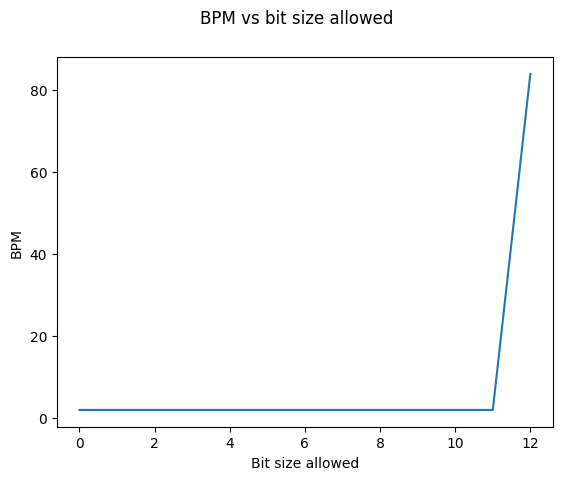

In [31]:
plt.plot(list_bpm)
plt.suptitle("BPM vs bit size allowed")
plt.xlabel("Bit size allowed")
plt.ylabel("BPM")

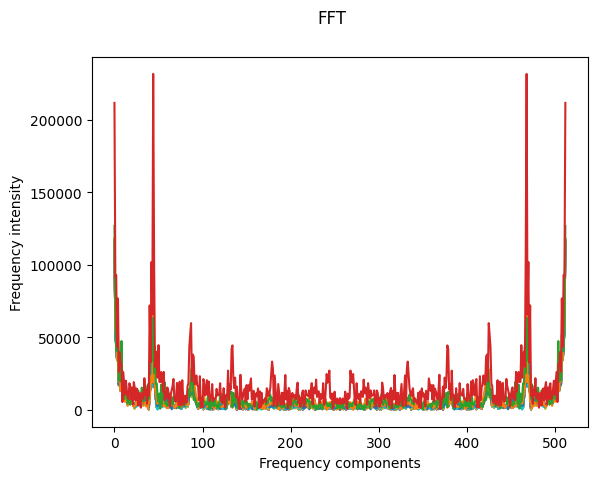

In [32]:
list_bpm = []
for i in range(15, 1, -1):
    precision = df["red_intensity_noise"].max()/(2**i)
    current_precision = -precision
    while current_precision <= df["red_intensity_noise"].max():
        current_precision += precision
        if current_precision == 0:
            list_precision = np.array(current_precision)
        else:
            list_precision = np.append(list_precision, current_precision)
    red_intensity_precision = [find_nearest(list_precision, ri) for ri in df["red_intensity_noise"]]
    freq_transform = np.fft.fft(red_intensity_precision)
    plt.plot(np.abs(freq_transform[1:]))
    plt.suptitle("FFT")
    plt.xlabel("Frequency components")
    plt.ylabel("Frequency intensity")

    bpm = get_bpm(np.abs(freq_transform), (1000/df["epoch_ms"].diff().mean()))
    list_bpm.append(bpm)

Text(0, 0.5, 'BPM')

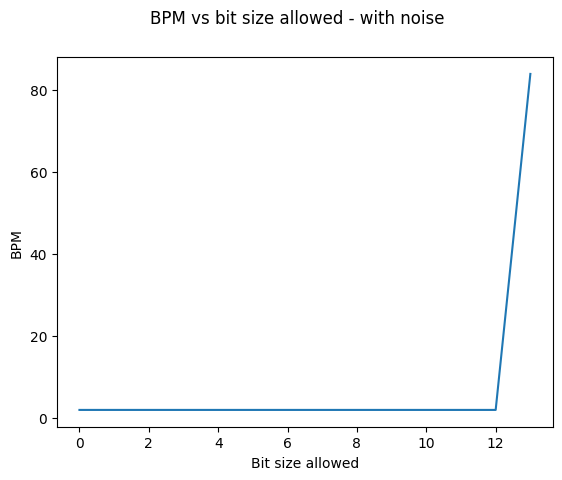

In [33]:
plt.plot(list_bpm)
plt.suptitle("BPM vs bit size allowed - with noise")
plt.xlabel("Bit size allowed")
plt.ylabel("BPM")

##### Observations Task 5

**Questions**
Assume that a 16-bit ADC was used in the sensor that maps the range 0 to 5 volts.
1. How many bits would have sufficed at the minimum without losing the accuracy of the signal?
2. Now start lowering the number of bits (of course virtually), one at a time, up to a minimum of 2 bits, and represent the data with the relevant number of bits. Plot detected BPM versus the number of ADC bits. To detect BPM, directly use a 512-bin FFT on all the samples.
3. Does the plot in 5.2 change if we consider the noisy samples as produced in 4.2?

**Description of the task**

We were asked to calculate the number of bits required to accurately represent our data.
We were then asked to virtually identify the BPM by reducing our representable bit length (reducing precision)
We were then asked to perform the same for noise added signal.

**Approach used**
We calculated the required bit size for two scenarios by using lograthims.
We then used our custom algorithm to identify the BPM for the bit reduced data.

**Assumptions**
1. We assume that the sampling rate of data is the mean of sampling rates between two consecutive samples in the data

**Inferences**
1. We can observe the number of bits required to precisely represent our data is 14 bits (when taking only max into consideration) and 12 bits when taking max and min into consideration.
2. We can observe that the BPM can be identified only till the bit size length is 12 below there is too much noise to identify. We can also vaguely observe this from the overlapped FFTs.
3. We can observe that adding noise did not change this much, as the reason for point 2 was not noise due to the environment but the noise due to our hardware (virtual) capabilities. 

